In [209]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

### Fields   ====>  Description
 - bearer id   ====>   xDr session identifier
 - Dur. (ms)   ====>   Total Duration of the xDR (in ms)
 - Start   ====>   Start time of the xDR (first frame timestamp)
 - Start ms   ====>   Milliseconds offset of start time for the xDR (first frame timestamp)
 - End   ====>   End time of the xDR (last frame timestamp)
 - End ms   ====>   Milliseconds offset of end time of the xDR (last frame timestamp)
 - Dur. (s)   ====>   Total Duration of the xDR (in s)
 - IMSI   ====>   International Mobile Subscriber Identity
 - MSISDN/Number   ====>   MS International PSTN/ISDN Number of mobile - customer number
 - IMEI   ====>   International Mobile Equipment Identity
 - Last Location Name   ====>   User location call name (2G/3G/4G) at the end of the bearer
 - Avg RTT DL (ms)   ====>   Average Round Trip Time measurement Downlink direction (msecond)
 - Avg RTT UL (ms)   ====>   Average Round Trip Time measurement Uplink direction (msecond)
 - Avg Bearer TP DL (kbps)   ====>   Average Bearer Throughput for Downlink (kbps) - based on BDR duration
 - Avg Bearer TP UL (kbps)   ====>   Average Bearer Throughput for uplink (kbps) - based on BDR duration
 - TCP DL Retrans. Vol (Bytes)   ====>   TCP volume of Downlink packets detected as retransmitted (bytes)
 - TCP UL Retrans. Vol (Bytes)   ====>   TCP volume of Uplink packets detected as retransmitted (bytes)
 - DL TP < 50 Kbps (%)   ====>   Duration ratio when Bearer Downlink Throughput < ….
 - 50 Kbps < DL TP < 250 Kbps (%)   ====>   Duration ratio when Bearer Downlink Throughput range is …
 - 250 Kbps < DL TP < 1 Mbps (%)   ====>   Duration ratio when Bearer Downlink Throughput range is …
 - DL TP > 1 Mbps (%)   ====>   Duration ratio when Bearer Downlink Throughput > ….
 - UL TP < 10 Kbps (%)   ====>   Duration ratio when Bearer Uplink Throughput < ….
 - 10 Kbps < UL TP < 50 Kbps (%)   ====>   Duration ratio when Bearer Uplink Throughput range is …
 - 50 Kbps < UL TP < 300 Kbps (%)   ====>   Duration ratio when Bearer Uplink Throughput range is …
 - UL TP > 300 Kbps (%)   ====>   Duration ratio when Bearer Uplink Throughput > ….
 - HTTP DL (Bytes)   ====>   HTTP data volume (in Bytes) received by the MS during this session
 - HTTP UL (Bytes)   ====>   HTTP data volume (in Bytes) sent by the MS during this session
 - Activity Duration DL (ms)   ====>   Activity Duration for downlink (ms) - excluding periods of inactivity > 500 ms
 - Activity Duration UL (ms)   ====>   Activity Duration for uplink (ms) - excluding periods of inactivity > 500 ms
 - Dur. (ms).1   ====>   Total Duration of the xDR (in ms)
 - Handset Manufacturer   ====>   Handset manufacturer 
 - Handset Type   ====>   Handset type of the mobile device
 - Nb of sec with 125000B < Vol DL   ====>   Number of seconds with IP Volume DL >
 - Nb of sec with 1250B < Vol UL < 6250B   ====>   Number of seconds with IP Volume UL between …
 - Nb of sec with 31250B < Vol DL < 125000B   ====>   Number of seconds with IP Volume DL between …
 - Nb of sec with 37500B < Vol UL   ====>   Number of seconds with IP Volume UL >
 - Nb of sec with 6250B < Vol DL < 31250B   ====>   Number of seconds with IP Volume DL between …
 - Nb of sec with 6250B < Vol UL < 37500B   ====>   Number of seconds with IP Volume UL between …
 - Nb of sec with Vol DL < 6250B   ====>   Number of seconds with IP Volume DL <
 - Nb of sec with Vol UL < 1250B   ====>   Number of seconds with IP Volume UL <
 - Social Media DL (Bytes)   ====>   Social Media data volume (in Bytes) received by the MS during this session
 - Social Media UL (Bytes)   ====>   Social Media data volume (in Bytes) sent by the MS during this session
 - YouTube DL (Bytes)   ====>   YouTube data volume (in Bytes) received by the MS during this session
 - YouTube UL (Bytes)   ====>   YouTube data volume (in Bytes) sent by the MS during this session
 - Netflix DL (Bytes)   ====>   Netflix data volume (in Bytes) received by the MS during this session
 - Netflix UL (Bytes)   ====>   Netflix data volume (in Bytes) sent by the MS during this session
 - Google DL (Bytes)   ====>   Google data volume (in Bytes) Received by the MS during this session
 - Google UL (Bytes)   ====>   Google data volume (in Bytes) sent by the MS during this session
 - Email DL (Bytes)   ====>   Email data volume (in Bytes) Received by the MS during this session
 - Email UL (Bytes)   ====>   Email data volume (in Bytes) sent by the MS during this session
 - Gaming DL (Bytes)   ====>   Gaming data volume (in Bytes) Received by the MS during this session
 - Gaming UL (Bytes)   ====>   Gaming data volume (in Bytes) sent by the MS during this session
 - Other DL   ====>   Other data volume (in Bytes) received by the MS during this session
 - Other UL   ====>   Other data volume (in Bytes) sent by the MS during this session
 - Total DL (Bytes)   ====>   Data volume (in Bytes) received by the MS during this session (IP layer + overhead)
 - Total UL (Bytes)   ====>   Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)

In [103]:
df = pd.read_excel("Week2_challenge_data_source.xlsx")
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [104]:
df.shape

(150001, 55)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [106]:
#total null values on each column
df.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [107]:
# perentage of null values on each column
null = df.isna().sum().sort_values(ascending = False)
(null/150001) * 100

Nb of sec with 37500B < Vol UL              86.835421
Nb of sec with 6250B < Vol UL < 37500B      74.561503
Nb of sec with 125000B < Vol DL             65.024900
TCP UL Retrans. Vol (Bytes)                 64.432237
Nb of sec with 31250B < Vol DL < 125000B    62.390251
Nb of sec with 1250B < Vol UL < 6250B       61.928920
Nb of sec with 6250B < Vol DL < 31250B      58.877607
TCP DL Retrans. Vol (Bytes)                 58.763608
HTTP UL (Bytes)                             54.539636
HTTP DL (Bytes)                             54.315638
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Last Location Name                           0.768662
MSISDN/Number                                0.710662
Nb of sec with Vol UL < 1250B                0.528663
10 Kbps < UL TP < 50 Kbps (%)                0.527996
UL TP < 10 Kbps (%)                          0.527996
UL TP > 300 Kbps (%)                         0.527996
50 Kbps < UL TP < 300 Kbps (

In [112]:
# Change dtype of user identification numbers to object and drop rows with null values
df[["IMSI", "MSISDN/Number", "IMEI"]] = df[["IMSI", "MSISDN/Number", "IMEI"]].astype('object')
df.dropna(subset=["IMSI", "MSISDN/Number", "IMEI"],inplace=True)

In [114]:
# filling numeric columns that have null values with mean
for col in df.columns:
    if is_numeric_dtype(df[col]):
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)

In [115]:
df.isnull().sum()

Bearer Id                                     0
Start                                         0
Start ms                                      0
End                                           0
End ms                                        0
Dur. (ms)                                     0
IMSI                                          0
MSISDN/Number                                 0
IMEI                                          0
Last Location Name                          589
Avg RTT DL (ms)                               0
Avg RTT UL (ms)                               0
Avg Bearer TP DL (kbps)                       0
Avg Bearer TP UL (kbps)                       0
TCP DL Retrans. Vol (Bytes)                   0
TCP UL Retrans. Vol (Bytes)                   0
DL TP < 50 Kbps (%)                           0
50 Kbps < DL TP < 250 Kbps (%)                0
250 Kbps < DL TP < 1 Mbps (%)                 0
DL TP > 1 Mbps (%)                            0
UL TP < 10 Kbps (%)                     

In [116]:
# the top 10 handsets used by the customers
top10Handsets = df["Handset Type"].value_counts().head(10)
top10Handsets

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Name: Handset Type, dtype: int64

In [117]:
# the top 3 handset manufacturers
top3HandsetManu = df["Handset Manufacturer"].value_counts().head(3)
top3HandsetManu

Apple      59464
Samsung    40579
Huawei     34366
Name: Handset Manufacturer, dtype: int64

In [118]:
# the top 5 handsets per handset manufacturer
names = list(top3HandsetManu.index)
for manufacturer in names:
    print(df.groupby(["Handset Manufacturer", "Handset Type"])["Handset Type"].count().loc[manufacturer].nlargest(5))

Handset Type
Apple iPhone 6S (A1688)    9413
Apple iPhone 6 (A1586)     9012
Apple iPhone 7 (A1778)     6304
Apple iPhone Se (A1723)    5176
Apple iPhone 8 (A1905)     4985
Name: Handset Type, dtype: int64
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4480
Samsung Galaxy A5 Sm-A520F      3708
Samsung Galaxy J5 (Sm-J530)     3682
Samsung Galaxy J3 (Sm-J330)     3464
Samsung Galaxy S7 (Sm-G930X)    3176
Name: Handset Type, dtype: int64
Handset Type
Huawei B528S-23A                  19727
Huawei E5180                       2074
Huawei P20 Lite Huawei Nova 3E     2018
Huawei P20                         1479
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


### Interpretation and Recommendation

### Task 1.1

Aggregate per user

In [138]:
# Number of xDR sessions
num_xdr_sessions = df.groupby("MSISDN/Number").agg({"Bearer Id": "count"})
num_xdr_sessions

,Bearer Id
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2
...,...
3.379000e+10,1
3.379000e+10,1
3.197021e+12,1


In [149]:
# Session duration in minutes
df["Session duration(mins)"] = df["Dur. (ms).1"]/60000000
session_duration = df.groupby("MSISDN/Number").agg({"Session duration(mins)": "sum"})
session_duration

,Session duration(mins)
MSISDN/Number,
3.360100e+10,1.945336
3.360100e+10,3.020516
3.360100e+10,2.249490
3.360101e+10,0.831300
3.360101e+10,0.618408
...,...
3.379000e+10,0.146845
3.379000e+10,2.349811
3.197021e+12,14.623089


In [259]:
# the total download (DL) and upload (UL) data in Megabytes
df["Total_DL_&_UL(MB)"] = (df["Total UL (Bytes)"] + df["Total DL (Bytes)"])/(1024**2)
total_DL_UL = df.groupby("MSISDN/Number").agg({"Total_DL_&_UL(MB)": "sum"})
total_DL_UL

,Total_DL_&_UL(MB)
MSISDN/Number,
3.360100e+10,837.984632
3.360100e+10,149.593013
3.360100e+10,568.357928
3.360101e+10,402.756403
3.360101e+10,1389.895386
...,...
3.379000e+10,681.535378
3.379000e+10,458.056769
3.197021e+12,221.370669


In [163]:
# the total data volume in Megabytes (Social Media)
df["Social Media_DL_&_UL(MB)"] = (df["Social Media UL (Bytes)"] + df["Social Media DL (Bytes)"])/(1024**2)
socialmedia_DL_UL = df.groupby("MSISDN/Number").agg({"Social Media_DL_&_UL(MB)": "sum"})
socialmedia_DL_UL

,Social Media_DL_&_UL(MB)
MSISDN/Number,
3.360100e+10,2.128730
3.360100e+10,2.537313
3.360100e+10,3.047584
3.360101e+10,0.267309
3.360101e+10,2.777617
...,...
3.379000e+10,0.286277
3.379000e+10,0.475472
3.197021e+12,0.682091


In [156]:
# the total data volume in Megabytes (Google)
df["Google_DL_&_UL(MB)"] = (df["Google UL (Bytes)"] + df["Google DL (Bytes)"])/(1024**2)
google_DL_UL = df.groupby("MSISDN/Number").agg({"Google_DL_&_UL(MB)": "sum"})
google_DL_UL

,Google_DL_&_UL(MB)
MSISDN/Number,
3.360100e+10,4.185681
3.360100e+10,5.087722
3.360100e+10,3.283621
3.360101e+10,9.230130
3.360101e+10,17.642609
...,...
3.379000e+10,7.182378
3.379000e+10,5.178170
3.197021e+12,9.955082


In [157]:
# the total data volume in Megabytes (Email)
df["Email_DL_&_UL(MB)"] = (df["Email UL (Bytes)"] + df["Email DL (Bytes)"])/(1024**2)
email_DL_UL = df.groupby("MSISDN/Number").agg({"Email_DL_&_UL(MB)": "sum"})
email_DL_UL

,Email_DL_&_UL(MB)
MSISDN/Number,
3.360100e+10,1.269686
3.360100e+10,3.154546
3.360100e+10,3.056889
3.360101e+10,2.178831
3.360101e+10,3.152341
...,...
3.379000e+10,0.960269
3.379000e+10,2.397630
3.197021e+12,1.450320


In [158]:
# the total data volume in Megabytes (Youtube)
df["Youtube_DL_&_UL(MB)"] = (df["Youtube UL (Bytes)"] + df["Youtube DL (Bytes)"])/(1024**2)
youtube_DL_UL = df.groupby("MSISDN/Number").agg({"Youtube_DL_&_UL(MB)": "sum"})
youtube_DL_UL

,Youtube_DL_&_UL(MB)
MSISDN/Number,
3.360100e+10,20.622776
3.360100e+10,11.856292
3.360100e+10,20.345278
3.360101e+10,6.654092
3.360101e+10,39.608957
...,...
3.379000e+10,25.413363
3.379000e+10,18.931934
3.197021e+12,11.405854


In [159]:
# the total data volume in Megabytes (Netflix)
df["Netflix_DL_&_UL(MB)"] = (df["Netflix UL (Bytes)"] + df["Netflix DL (Bytes)"])/(1024**2)
netflix_DL_UL = df.groupby("MSISDN/Number").agg({"Netflix_DL_&_UL(MB)": "sum"})
netflix_DL_UL

,Netflix_DL_&_UL(MB)
MSISDN/Number,
3.360100e+10,25.921803
3.360100e+10,10.701907
3.360100e+10,18.457317
3.360101e+10,1.852123
3.360101e+10,46.922421
...,...
3.379000e+10,14.212168
3.379000e+10,8.135853
3.197021e+12,25.360394


In [160]:
# the total data volume in Megabytes (Gaming)
df["Gaming_DL_&_UL(MB)"] = (df["Gaming UL (Bytes)"] + df["Gaming DL (Bytes)"])/(1024**2)
gaming_DL_UL = df.groupby("MSISDN/Number").agg({"Gaming_DL_&_UL(MB)": "sum"})
gaming_DL_UL

,Gaming_DL_&_UL(MB)
MSISDN/Number,
3.360100e+10,774.820958
3.360100e+10,114.202574
3.360100e+10,513.866151
3.360101e+10,373.006942
3.360101e+10,1253.888912
...,...
3.379000e+10,629.769668
3.379000e+10,416.758816
3.197021e+12,169.800508


In [161]:
# the total data volume in Megabytes (Other)
df["Other_DL_&_UL(MB)"] = (df["Other UL (Bytes)"] + df["Other DL (Bytes)"])/(1024**2)
other_DL_UL = df.groupby("MSISDN/Number").agg({"Other_DL_&_UL(MB)": "sum"})
other_DL_UL

,Other_DL_&_UL(MB)
MSISDN/Number,
3.360100e+10,368.662712
3.360100e+10,268.659659
3.360100e+10,478.452370
3.360101e+10,33.645346
3.360101e+10,767.521366
...,...
3.379000e+10,281.603639
3.379000e+10,201.335061
3.197021e+12,448.729012


### Task 1.2 - Exploratory Data Analysis

#### Non Graphical Univariate Analysis

In [307]:
datacols = df[["Bearer Id","Session duration(mins)","Total_DL_&_UL(MB)","Social Media_DL_&_UL(MB)","Google_DL_&_UL(MB)","Email_DL_&_UL(MB)","Youtube_DL_&_UL(MB)","Netflix_DL_&_UL(MB)","Gaming_DL_&_UL(MB)","Other_DL_&_UL(MB)"]]
datacols.describe()

,Session duration(mins),Total_DL_&_UL(MB),Social Media_DL_&_UL(MB),Google_DL_&_UL(MB),Email_DL_&_UL(MB),Youtube_DL_&_UL(MB),Netflix_DL_&_UL(MB),Gaming_DL_&_UL(MB),Other_DL_&_UL(MB)
count,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000
mean,1.747845,472.777128,1.743396,7.446090,2.154501,21.593209,21.579479,410.380062,409.517763
std,1.351057,233.066138,0.987647,3.354105,1.021493,8.818891,8.831268,232.723333,231.991585
min,0.119050,27.614696,0.001491,0.038462,0.007972,0.075248,0.093872,0.292166,0.142140
25%,0.964737,271.286078,0.888932,4.715064,1.296365,15.252821,15.239621,208.576440,208.468077
50%,1.440000,473.829307,1.741051,7.452721,2.159089,21.612834,21.584313,411.594746,410.153125
75%,2.211676,673.721585,2.601138,10.188241,3.013621,27.938118,27.930852,611.694324,610.270047
max,30.988941,911.698128,3.481732,14.809401,4.308735,43.096617,43.104318,819.399628,819.703039


#### Graphical Univariate Analysis

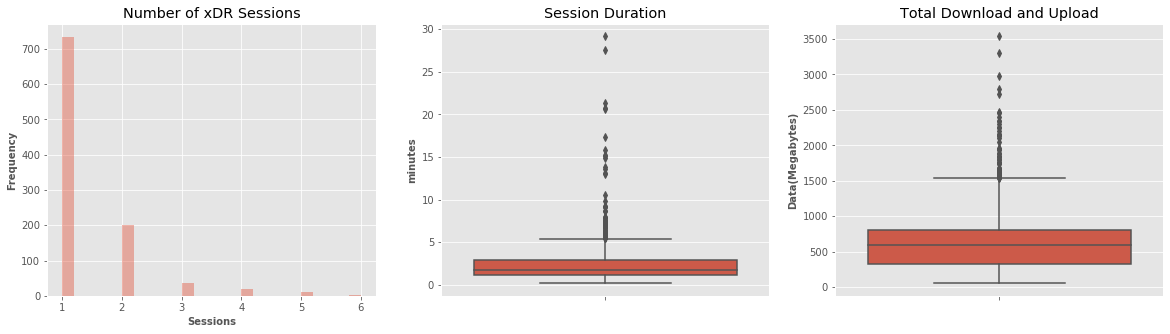

In [155]:
fig, axs = plt.subplots(1,3, figsize = (20,5))
# fig.suptitle("TEST SCORES FOR STUDENTS")
plot1 = sns.distplot(num_xdr_sessions.sample(n=1000, random_state=1), kde=False, ax=axs[0]) 
plot2 = sns.boxplot(session_duration.sample(n=1000, random_state=1), orient="v", ax=axs[1])
plot3 = sns.boxplot(total_DL_UL.sample(n=1000, random_state=1), orient="v", ax=axs[2]) 

plot1.set_title("Number of xDR Sessions")
plot1.set_xlabel("Sessions", size=10, weight='bold')
plot1.set_ylabel("Frequency", size=10, weight='bold')

plot2.set_title("Session Duration")
plot2.set_ylabel("minutes", size=10, weight='bold')

plot3.set_title("Total Download and Upload")
plot3.set_ylabel("Data(Megabytes)", size=10, weight='bold')

plt.show()
# fig.savefig('1set.png')

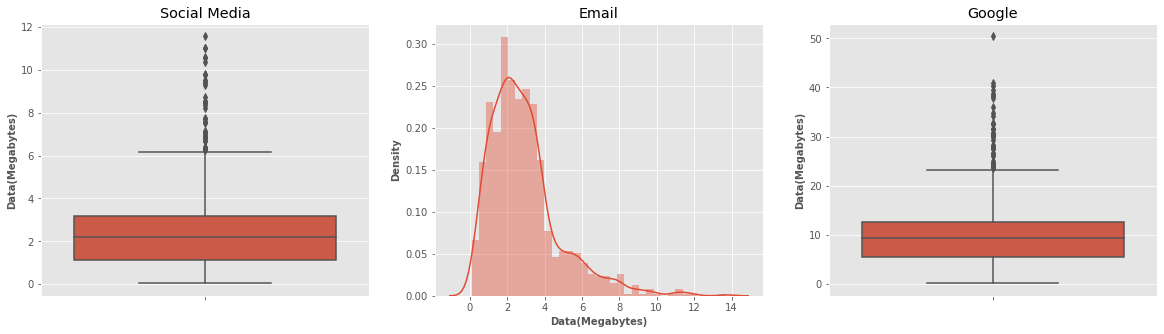

In [167]:
fig, axs = plt.subplots(1,3, figsize = (20,5))
# fig.suptitle("TEST SCORES FOR STUDENTS")
plot1 = sns.boxplot(socialmedia_DL_UL.sample(n=1000, random_state=1), orient="v", ax=axs[0]) 
plot2 = sns.distplot(email_DL_UL.sample(n=1000, random_state=1), ax=axs[1])
plot3 = sns.boxplot(google_DL_UL.sample(n=1000, random_state=1), orient="v", ax=axs[2]) 

plot1.set_title("Social Media")
plot1.set_ylabel("Data(Megabytes)", size=10, weight='bold')

plot2.set_title("Email")
plot2.set_xlabel("Data(Megabytes)", size=10, weight='bold')
plot2.set_ylabel("Density", size=10, weight='bold')

plot3.set_title("Google")
plot3.set_ylabel("Data(Megabytes)", size=10, weight='bold')

plt.show()
# fig.savefig('2set.png')

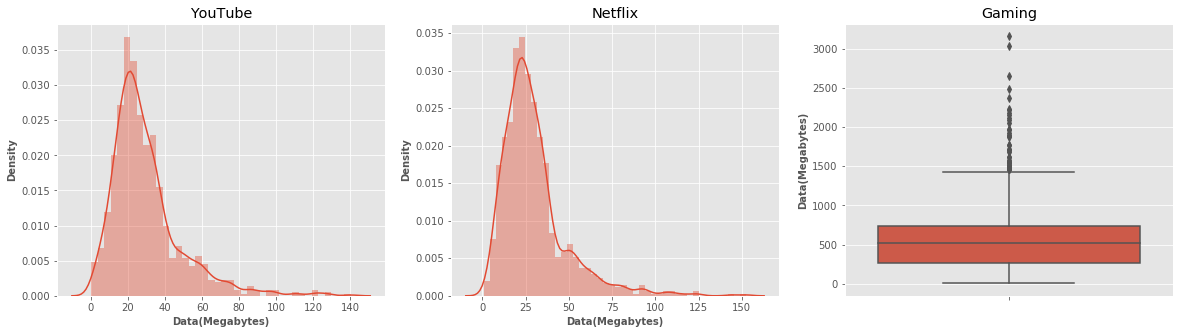

In [168]:
fig, axs = plt.subplots(1,3, figsize = (20,5))
# fig.suptitle("TEST SCORES FOR STUDENTS")
plot1 = sns.distplot(youtube_DL_UL.sample(n=1000, random_state=1), ax=axs[0]) 
plot2 = sns.distplot(netflix_DL_UL.sample(n=1000, random_state=1), ax=axs[1])
plot3 = sns.boxplot(gaming_DL_UL.sample(n=1000, random_state=1), orient="v", ax=axs[2]) 

plot1.set_title("YouTube")
plot1.set_xlabel("Data(Megabytes)", size=10, weight='bold')
plot1.set_ylabel("Density", size=10, weight='bold')

plot2.set_title("Netflix")
plot2.set_xlabel("Data(Megabytes)", size=10, weight='bold')
plot2.set_ylabel("Density", size=10, weight='bold')

plot3.set_title("Gaming")
plot3.set_ylabel("Data(Megabytes)", size=10, weight='bold')

plt.show()
# fig.savefig('3set.png')

Text(0, 0.5, 'Data(Megabytes)')

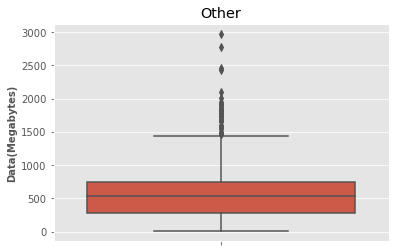

In [170]:
plot4 = sns.boxplot(other_DL_UL.sample(n=1000, random_state=1), orient="v")
plot4.set_title("Other")
plot4.set_ylabel("Data(Megabytes)", size=10, weight='bold')

#### Bivariate & Correlation Analysis between each application & the total DL+UL

In [308]:
datacols.corr()

,Session duration(mins),Total_DL_&_UL(MB),Social Media_DL_&_UL(MB),Google_DL_&_UL(MB),Email_DL_&_UL(MB),Youtube_DL_&_UL(MB),Netflix_DL_&_UL(MB),Gaming_DL_&_UL(MB),Other_DL_&_UL(MB)
Session duration(mins),1.000000,0.000756,-0.002795,-0.000246,0.003282,0.004407,-0.005086,0.000758,-0.000335
Total_DL_&_UL(MB),0.000756,1.000000,0.005710,0.013426,0.003897,0.034792,0.034825,0.998254,-0.002552
Social Media_DL_&_UL(MB),-0.002795,0.005710,1.000000,-0.001855,0.004122,0.000677,0.001421,0.001387,0.005849
Google_DL_&_UL(MB),-0.000246,0.013426,-0.001855,1.000000,-0.000288,0.002542,-0.001911,-0.000949,-0.001904
Email_DL_&_UL(MB),0.003282,0.003897,0.004122,-0.000288,1.000000,-0.003233,0.001287,-0.000513,-0.001034
Youtube_DL_&_UL(MB),0.004407,0.034792,0.000677,0.002542,-0.003233,1.000000,0.003194,-0.003118,0.003198
Netflix_DL_&_UL(MB),-0.005086,0.034825,0.001421,-0.001911,0.001287,0.003194,1.000000,-0.003092,-0.008791
Gaming_DL_&_UL(MB),0.000758,0.998254,0.001387,-0.000949,-0.000513,-0.003118,-0.003092,1.000000,-0.002789
Other_DL_&_UL(MB),-0.000335,-0.002552,0.005849,-0.001904,-0.001034,0.003198,-0.008791,-0.002789,1.000000


#### Variable Transformations

In [249]:
decile_df = session_duration.reset_index()
# total_DL_UL = total_DL_UL.reset_index()
decile_df["Total_DL_&_UL(MB)"] = total_DL_UL["Total_DL_&_UL(MB)"]
decile_df = decile_df.sort_values("Session duration(mins)",ascending=False).reset_index()
decile_df["Decile"] = pd.qcut(sess_df['MSISDN/Number'], 10, labels=False)
decile_df

,index,MSISDN/Number,Session duration(mins),Total_DL_&_UL(MB),Decile
0,13180,3.362578e+10,309.229391,8105.869982,1
1,6437,3.361489e+10,166.115096,8436.419004,0
2,92923,3.376054e+10,154.657367,8120.321239,8
3,13526,3.362632e+10,146.532278,7601.897489,1
4,65118,3.366716e+10,145.748700,5358.118109,6
...,...,...,...,...,...
106851,24741,3.365043e+10,0.121117,199.216558,2
106852,85146,3.369839e+10,0.120968,797.900773,7
106853,35287,3.365933e+10,0.119817,266.842393,3
106854,60767,3.366566e+10,0.119110,647.084608,5


In [232]:
sess_df["Decile"].unique()

[9, 10, 2, 4, 6, 5, 7, 3, 1, 8]
Categories (10, int64): [10 < 9 < 8 < 7 ... 4 < 3 < 2 < 1]

#### Dimensionality Reduction

In [321]:
pca_df = datacols.drop(["Session duration(mins)","Bearer Id"], 1)
pca_df.head()

,Total_DL_&_UL(MB),Social Media_DL_&_UL(MB),Google_DL_&_UL(MB),Email_DL_&_UL(MB),Youtube_DL_&_UL(MB),Netflix_DL_&_UL(MB),Gaming_DL_&_UL(MB),Other_DL_&_UL(MB)
0,329.617860,1.497445,2.771294,3.529839,17.505591,17.028033,278.879598,172.194331
1,674.424511,1.843718,4.209610,0.893960,37.535786,33.917947,581.665786,516.852744
2,293.436978,1.646306,9.755248,3.207325,32.830464,22.650911,219.326259,395.687438
3,848.152874,0.627034,11.264573,1.975043,34.842267,14.393414,772.846103,726.544586
4,579.530147,0.870502,7.389873,2.012586,32.636884,16.727256,506.627130,538.463423


In [323]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(pca_df)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

In [324]:
principal_df.head()

,principal component 1,principal component 2
0,0.861887,-0.489266
1,-1.191067,-0.192510
2,1.084274,-0.166031
3,-2.253009,1.070778
4,-0.624670,0.479013


In [325]:
principal_components.shape

(148935, 2)

In [326]:
pca.explained_variance_ratio_

array([0.24992348, 0.12625751])

In [327]:
pca.components_

array([[-7.07170929e-01, -5.03796527e-03, -8.84107082e-03,
        -2.37352705e-03, -2.24934486e-02, -2.25571558e-02,
        -7.06236618e-01,  3.89323761e-03],
       [ 7.77518075e-05,  3.63326674e-01, -8.58419380e-02,
        -1.54158731e-02,  5.66863735e-02, -5.63532598e-01,
         1.86986827e-02,  7.34340016e-01]])

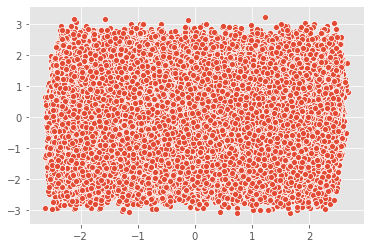

In [328]:
sns.scatterplot(principal_components[:,0],principal_components[:,1])

### Task 2.1

#### top 10 customers per engagement metric

In [264]:
# Sessions Frequency
session_frequency = df.groupby("MSISDN/Number").agg({"Session duration(mins)": "count"})
session_frequency.rename(columns={"Session duration(mins)":"Session Frequency"}, inplace=True)
session_frequency.reset_index().sort_values("Session Frequency",ascending=False).head(10)

,MSISDN/Number,Session Frequency
13526,3.362632e+10,18
13180,3.362578e+10,17
6437,3.361489e+10,17
37052,3.365973e+10,16
92923,3.376054e+10,15
76363,3.367588e+10,15
65118,3.366716e+10,13
13994,3.362708e+10,12
1279,3.360452e+10,12
92577,3.376041e+10,12


In [255]:
session_duration.reset_index().sort_values("Session duration(mins)",ascending=False).head(10)

,MSISDN/Number,Session duration(mins)
13180,3.362578e+10,309.229391
6437,3.361489e+10,166.115096
92923,3.376054e+10,154.657367
13526,3.362632e+10,146.532278
65118,3.366716e+10,145.748700
50281,3.366284e+10,110.237905
57160,3.366469e+10,104.812263
666,3.360313e+10,104.796125
66029,3.366746e+10,94.164756
92577,3.376041e+10,88.694563


In [260]:
total_DL_UL.reset_index().sort_values("Total_DL_&_UL(MB)",ascending=False).head(10)

,MSISDN/Number,Total_DL_&_UL(MB)
6437,3.361489e+10,8436.419004
92923,3.376054e+10,8120.321239
13180,3.362578e+10,8105.869982
13526,3.362632e+10,7601.897489
76363,3.367588e+10,7525.549515
37052,3.365973e+10,7348.883422
63028,3.366646e+10,6969.929636
92577,3.376041e+10,6801.958574
57241,3.366471e+10,6553.667267
86455,3.369879e+10,6237.887503


#### classifying customers in three groups of engagement

In [272]:
eng_metrics = session_frequency
eng_metrics["Session duration(mins)"] = session_duration["Session duration(mins)"]
eng_metrics["Total_DL_&_UL(MB"] = total_DL_UL["Total_DL_&_UL(MB)"]
eng_metrics = eng_metrics.reset_index()
eng_metrics

,MSISDN/Number,Session Frequency,Session duration(mins),Total_DL_&_UL(MB
0,3.360100e+10,1,1.945336,837.984632
1,3.360100e+10,1,3.020516,149.593013
2,3.360100e+10,1,2.249490,568.357928
3,3.360101e+10,1,0.831300,402.756403
4,3.360101e+10,2,0.618408,1389.895386
...,...,...,...,...
106851,3.379000e+10,1,0.146845,681.535378
106852,3.379000e+10,1,2.349811,458.056769
106853,3.197021e+12,1,14.623089,221.370669
106854,3.370000e+14,1,4.217170,568.664383


In [285]:
#normalizing each engagement metric
norm_eng_metrics = eng_metrics.iloc[:,1:].apply(lambda x: x/x.max(), axis=0)
norm_eng_metrics

,Session Frequency,Session duration(mins),Total_DL_&_UL(MB
0,0.055556,0.006291,0.099329
1,0.055556,0.009768,0.017732
2,0.055556,0.007275,0.067370
3,0.055556,0.002688,0.047740
4,0.111111,0.002000,0.164749
...,...,...,...
106851,0.055556,0.000475,0.080785
106852,0.055556,0.007599,0.054295
106853,0.055556,0.047289,0.026240
106854,0.055556,0.013638,0.067406


In [277]:
# k-means (k=3) clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(norm_eng_metrics)
print(kmeans)
centroids = kmeans.cluster_centers_
print(centroids)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
[[0.05824539 0.00579308 0.05611605]
 [0.23657662 0.03083575 0.25931994]
 [0.12141035 0.01158721 0.12873909]]


In [286]:
eng_metrics['cluster'] = kmeans.labels_
eng_metrics

,MSISDN/Number,Session Frequency,Session duration(mins),Total_DL_&_UL(MB,cluster
0,3.360100e+10,1,1.945336,837.984632,0
1,3.360100e+10,1,3.020516,149.593013,0
2,3.360100e+10,1,2.249490,568.357928,0
3,3.360101e+10,1,0.831300,402.756403,0
4,3.360101e+10,2,0.618408,1389.895386,2
...,...,...,...,...,...
106851,3.379000e+10,1,0.146845,681.535378,0
106852,3.379000e+10,1,2.349811,458.056769,0
106853,3.197021e+12,1,14.623089,221.370669,0
106854,3.370000e+14,1,4.217170,568.664383,0


In [287]:
eng_metrics["cluster"].unique()

array([0, 2, 1])

In [295]:
grouped = eng_metrics.groupby("cluster")

In [298]:
grouped.min()

,MSISDN/Number,Session Frequency,Session duration(mins),Total_DL_&_UL(MB
cluster,,,,
0,3.360100e+10,1,0.119050,31.708726
1,3.360105e+10,3,0.822079,1035.684467
2,3.360101e+10,2,0.303930,271.051626


In [300]:
grouped.max()

,MSISDN/Number,Session Frequency,Session duration(mins),Total_DL_&_UL(MB
cluster,,,,
0,8.823971e+14,2,26.223683,906.716023
1,3.378988e+10,18,309.229391,8436.419004
2,3.378998e+10,4,52.913743,1786.546978


In [301]:
grouped.mean()

,MSISDN/Number,Session Frequency,Session duration(mins),Total_DL_&_UL(MB
cluster,,,,
0,4.863735e+10,1.048569,1.791771,473.441874
1,3.367791e+10,4.260271,9.539285,2188.425191
2,3.367423e+10,2.185731,3.583679,1086.564641


In [302]:
grouped.sum()

,MSISDN/Number,Session Frequency,Session duration(mins),Total_DL_&_UL(MB
cluster,,,,
0,3.973623e+15,85667,146385.919399,3.867973e+07
1,1.344422e+14,17007,38080.824748,8.736193e+06
2,7.127151e+14,46261,75848.570751,2.299714e+07


#### top 10 most engaged users per application

In [309]:
socialmedia_DL_UL.reset_index().sort_values("Social Media_DL_&_UL(MB)", ascending=False).head(10)

,MSISDN/Number,Social Media_DL_&_UL(MB)
13526,3.362632e+10,41.365413
92923,3.376054e+10,37.940206
37052,3.365973e+10,33.771856
6437,3.361489e+10,26.983780
13180,3.362578e+10,25.878429
65118,3.366716e+10,23.124552
106137,3.378632e+10,22.864264
70960,3.366907e+10,22.698244
666,3.360313e+10,22.008729
31331,3.365849e+10,21.934572


In [310]:
google_DL_UL.reset_index().sort_values("Google_DL_&_UL(MB)", ascending=False).head(10)

,MSISDN/Number,Google_DL_&_UL(MB)
13526,3.362632e+10,145.141460
13180,3.362578e+10,135.715404
6437,3.361489e+10,122.045314
92923,3.376054e+10,117.514705
37052,3.365973e+10,111.118646
106137,3.378632e+10,105.146870
76363,3.367588e+10,104.771139
65118,3.366716e+10,100.166985
94654,3.376127e+10,92.592228
86313,3.369876e+10,87.676192


In [311]:
email_DL_UL.reset_index().sort_values("Email_DL_&_UL(MB)", ascending=False).head(10)

,MSISDN/Number,Email_DL_&_UL(MB)
13526,3.362632e+10,40.453703
6437,3.361489e+10,38.899073
13180,3.362578e+10,38.751570
106137,3.378632e+10,34.628032
37052,3.365973e+10,34.332077
92923,3.376054e+10,32.132880
76363,3.367588e+10,30.054494
60087,3.366546e+10,29.008756
65118,3.366716e+10,28.930470
86455,3.369879e+10,27.712862


In [312]:
youtube_DL_UL.reset_index().sort_values("Youtube_DL_&_UL(MB)", ascending=False).head(10)

,MSISDN/Number,Youtube_DL_&_UL(MB)
13180,3.362578e+10,431.975144
92923,3.376054e+10,377.930830
6437,3.361489e+10,376.100748
13526,3.362632e+10,357.134864
76363,3.367588e+10,302.706310
65118,3.366716e+10,300.628004
13994,3.362708e+10,294.485830
92577,3.376041e+10,289.124591
86455,3.369879e+10,288.640936
666,3.360313e+10,270.929469


In [313]:
netflix_DL_UL.reset_index().sort_values("Netflix_DL_&_UL(MB)", ascending=False).head(10)

,MSISDN/Number,Netflix_DL_&_UL(MB)
37052,3.365973e+10,381.011085
6437,3.361489e+10,344.658895
13180,3.362578e+10,340.443236
92923,3.376054e+10,319.140691
13526,3.362632e+10,313.497295
92577,3.376041e+10,303.599878
65118,3.366716e+10,299.396027
76363,3.367588e+10,294.774207
106137,3.378632e+10,291.766920
94654,3.376127e+10,278.560010


In [314]:
gaming_DL_UL.reset_index().sort_values("Gaming_DL_&_UL(MB)", ascending=False).head(10)

,MSISDN/Number,Gaming_DL_&_UL(MB)
6437,3.361489e+10,7390.434488
92923,3.376054e+10,7115.407207
13180,3.362578e+10,6987.260329
76363,3.367588e+10,6647.651288
13526,3.362632e+10,6568.500629
37052,3.365973e+10,6413.993083
63028,3.366646e+10,6338.408792
92577,3.376041e+10,5978.221504
57241,3.366471e+10,5821.090706
86455,3.369879e+10,5487.196988


In [315]:
other_DL_UL.reset_index().sort_values("Other_DL_&_UL(MB)", ascending=False).head(10)

,MSISDN/Number,Other_DL_&_UL(MB)
13526,3.362632e+10,7789.495255
6437,3.361489e+10,7285.369465
76363,3.367588e+10,6483.569288
13180,3.362578e+10,6060.202681
666,3.360313e+10,6033.583521
37052,3.365973e+10,6024.756896
13936,3.362695e+10,5059.669382
13994,3.362708e+10,4880.705729
94654,3.376127e+10,4842.547834
30715,3.365836e+10,4781.390041


#### top 3 most used applications

In [352]:
top3apps = datacols.iloc[:,3:-1].sum().sort_values(ascending=False).head(3)
top3muapps = list(top3apps.index)
top3muapps

['Gaming_DL_&_UL(MB)', 'Youtube_DL_&_UL(MB)', 'Netflix_DL_&_UL(MB)']

In [353]:
values = list(top3apps)
values

[61119954.49944687, 3215984.6433324814, 3213939.702260971]

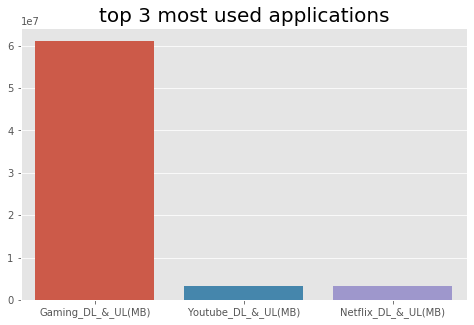

In [358]:
#number of xDR sessions
plt.figure(figsize=(8, 5))
sns.barplot(x=top3muapps,y=values)
plt.title(f"top 3 most used applications", size=20)
# plt.savefig('No_xdr_session.png')#saving the figure
plt.show()

#### k engagement clusters

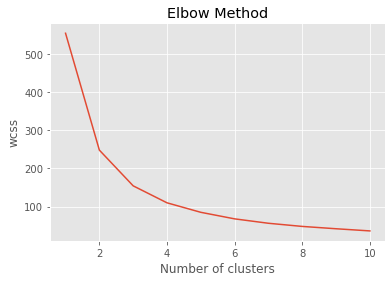

In [360]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(norm_eng_metrics)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()